# DATA CLEANING

### Importing libraries and loading the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from IPython.display import display, HTML


In [2]:
data = pd.read_csv("Superstore.csv", encoding='latin1')

While working with this CSV file, I encountered a UnicodeDecodeError due to an invalid byte (0xA0) when attempting to read the file using UTF-8 encoding. This issue typically arises when files contain non-standard characters like non-breaking spaces, often introduced through sources like Excel or web data exports. To resolve the problem, I changed the file reading encoding from `utf-8` to `latin1`, which can handle a wider range of byte values without raising decoding errors. This adjustment allowed the file to load successfully without data loss.

In [3]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


Row ID: Unique ID for each row.

Order ID: Unique Order ID for each Customer.

Order Date: Order Date of the product.

Ship Date: Shipping Date of the Product.

Ship Mode: Shipping Mode specified by the Customer.

Customer ID: Unique ID to identify each Customer.

Customer Name: Name of the Customer.

Segment: The segment where the Customer belongs.

Country: Country of residence of the Customer.

City: City of residence of the Customer.

State: State of residence of the Customer.

Postal Code: Postal Code of every Customer.

Region: Region where the Customer belongs.

Product ID: Unique ID of the Product.

Category: Category of the product ordered.

Sub-Category: Sub-Category of the product ordered.

Product Name: Name of the Product.

Sales: Sales of the Product.

Quantity: Quantity of the Product.

Discount: Discount provided.

In [4]:
data.shape

(9994, 21)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

**Numeric Columns Summary**

In [6]:
data[["Sales","Quantity","Discount","Profit"]].describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


**Categorical Columns Summary**

In [7]:
(
    data
    .drop(columns=["Order ID","Order Date","Ship Date","Customer ID","Product ID"])
    .describe(include='O')
)

,Ship Mode,Customer Name,Segment,Country,City,State,Region,Category,Sub-Category,Product Name
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,4,793,3,1,531,49,4,3,17,1850
top,Standard Class,William Brown,Consumer,United States,New York City,California,West,Office Supplies,Binders,Staple envelope
freq,5968,37,5191,9994,915,2001,3203,6026,1523,48


**Checking for null values**

In [8]:
(
    data
    .isna().sum()
)

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


**Checking for duplicates**

In [9]:
(
    data
    .duplicated()
    .sum()
)

np.int64(0)

### Analyzing individual columns

Now we are going to look at the individual columns to check if there are any inconsistencies or inaccuracies in their values.

In [10]:
# Ship Mode

(
    data['Ship Mode']
    .value_counts()
    .reset_index()
)

,Ship Mode,count
0,Standard Class,5968
1,Second Class,1945
2,First Class,1538
3,Same Day,543


In [11]:
# Customer Name

(
    data['Customer Name']
    .value_counts()
    .reset_index()
)


,Customer Name,count
0,William Brown,37
1,Matt Abelman,34
2,John Lee,34
3,Paul Prost,34
4,Chloris Kastensmidt,32
...,...,...
788,Anthony O'Donnell,1
789,Lela Donovan,1
790,Jocasta Rupert,1
791,Carl Jackson,1


In [12]:
# Segment

(
    data['Segment']
    .value_counts()
    .reset_index()
)

,Segment,count
0,Consumer,5191
1,Corporate,3020
2,Home Office,1783


In [13]:
# Country

(
    data['Country']
    .value_counts()
    .reset_index()
)

,Country,count
0,United States,9994


In [14]:
# Product Name

(
    data['Product Name']
    .value_counts()
    .reset_index()
)

,Product Name,count
0,Staple envelope,48
1,Staples,46
2,Easy-staple paper,46
3,Avery Non-Stick Binders,20
4,Staples in misc. colors,19
...,...,...
1845,Xiaomi Mi3,1
1846,Sanitaire Vibra Groomer IR Commercial Upright ...,1
1847,Holmes Harmony HEPA Air Purifier for 17 x 20 Room,1
1848,Avery Hi-Liter Pen Style Six-Color Fluorescent...,1


**Initial Observations:**

- There are approx 1000 rows and 21 columns in our dataset.
- In the `Profit` column, we can see that the max value is much higher than 75%, the min value is much lower than 25%, and the std dev is also much higher than mean. These indicates that there are potential outliers in our `Profit` column.
- In the `Sales` column, we can see that the max value is much higher than 75%, and the min value is much lower than 25%. These indicates that there are potential outliers in our `Sales` column.

- From the initial analysis of the `categorical` columns, we can observe that `Standard Class` is the most frequent `Ship Mode`, `William Brown` has most number of orders, and other most frequent values from their respective categories.
- We can create a new column showing the number of days between `Ship Date` and `Order Date`


**Data Cleaning:**

- The datatype of `Order Date` and `Ship Date` should be changed to datetime
- There are no null values in the dataset
- There are no duplicate rows in the dataset
- The columns `Row ID`, `Order ID`, `Customer ID`, `Postal Code`, `Product ID` are not required for our analysis, so we will drop them.
- The column names have white space between them and are in capital, we are going to convert them to lower case and replace the white space with underscore.

In [15]:
(
    data
    .rename(
        columns = lambda df_:df_.strip().lower().replace(' ','_')
    )
    .assign(
        order_date = lambda df_: pd.to_datetime(df_.order_date),
        ship_date = lambda df_: pd.to_datetime(df_.ship_date)
    )
    .drop(columns=['row_id','order_id','customer_id','postal_code','product_id'])
    .assign(
        days_gap = lambda df_ : (df_.ship_date - df_.order_date).dt.days
    )
)

,order_date,ship_date,ship_mode,customer_name,segment,country,city,state,region,category,sub-category,product_name,sales,quantity,discount,profit,days_gap
0,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,3
1,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,3
2,2016-06-12,2016-06-16,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,4
3,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,7
4,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,2014-01-21,2014-01-23,Second Class,Tom Boeckenhauer,Consumer,United States,Miami,Florida,South,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028,2
9990,2017-02-26,2017-03-03,Standard Class,Dave Brooks,Consumer,United States,Costa Mesa,California,West,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332,5
9991,2017-02-26,2017-03-03,Standard Class,Dave Brooks,Consumer,United States,Costa Mesa,California,West,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932,5
9992,2017-02-26,2017-03-03,Standard Class,Dave Brooks,Consumer,United States,Costa Mesa,California,West,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200,5


In [16]:
def data_cleaning(df):

  return(
      df
      .rename(
          columns = lambda df_:df_.strip().lower().replace(' ','_').replace('-','_')
      )
      .assign(
          order_date = lambda df_: pd.to_datetime(df_.order_date),
          ship_date = lambda df_: pd.to_datetime(df_.ship_date)
      )
      .drop(columns=['row_id','order_id','customer_id','postal_code','product_id'])
      .assign(
        days_gap = lambda df_ : (df_.ship_date - df_.order_date).dt.days
      )
  )

In [17]:
store = data_cleaning(data)

In [18]:
store.head()

,order_date,ship_date,ship_mode,customer_name,segment,country,city,state,region,category,sub_category,product_name,sales,quantity,discount,profit,days_gap
0,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,3
1,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,3
2,2016-06-12,2016-06-16,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,4
3,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,7
4,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,7


# EXPLORATORY DATA ANALYSIS

**EXPLORATION**

- Analysing and dealing with Outliers
- Analysis of the days_gap between order_date and shipping_date
- Any correlation between discount-quantity, discount-profit, discount-sales
- country, city, state and region wise analysis
- category and sub_category wise analysis
- Detailed analysis of each feature

**COLUMNS:**

- Numeric

  - `sales`, `quantity`, `discount`, `profit`, `days_gap`

- Categorical

  - `order_date`, `ship_date`, `ship_mode`, `customer_name`, `segment`,`country`, `city`, `state`, `region`, `category`, `sub_category`,`product_name`

### Pair Plots


In [19]:
def display_html(size=3, content="content"):
  display(HTML(f"<h{size}>{content}</h{size}>"))



def pair_plots(data,
               height=3,
               aspect=1.5,
               hue=None,
               legend=False):
  display_html(2, "Pair Plots")

  pair_grid = sns.PairGrid(
      data=data,
      aspect=aspect,
      height=height,
      hue=hue,
      corner=True
  )
  pair_grid.map_lower(sns.scatterplot)

  if legend:
    pair_grid.add_legend()

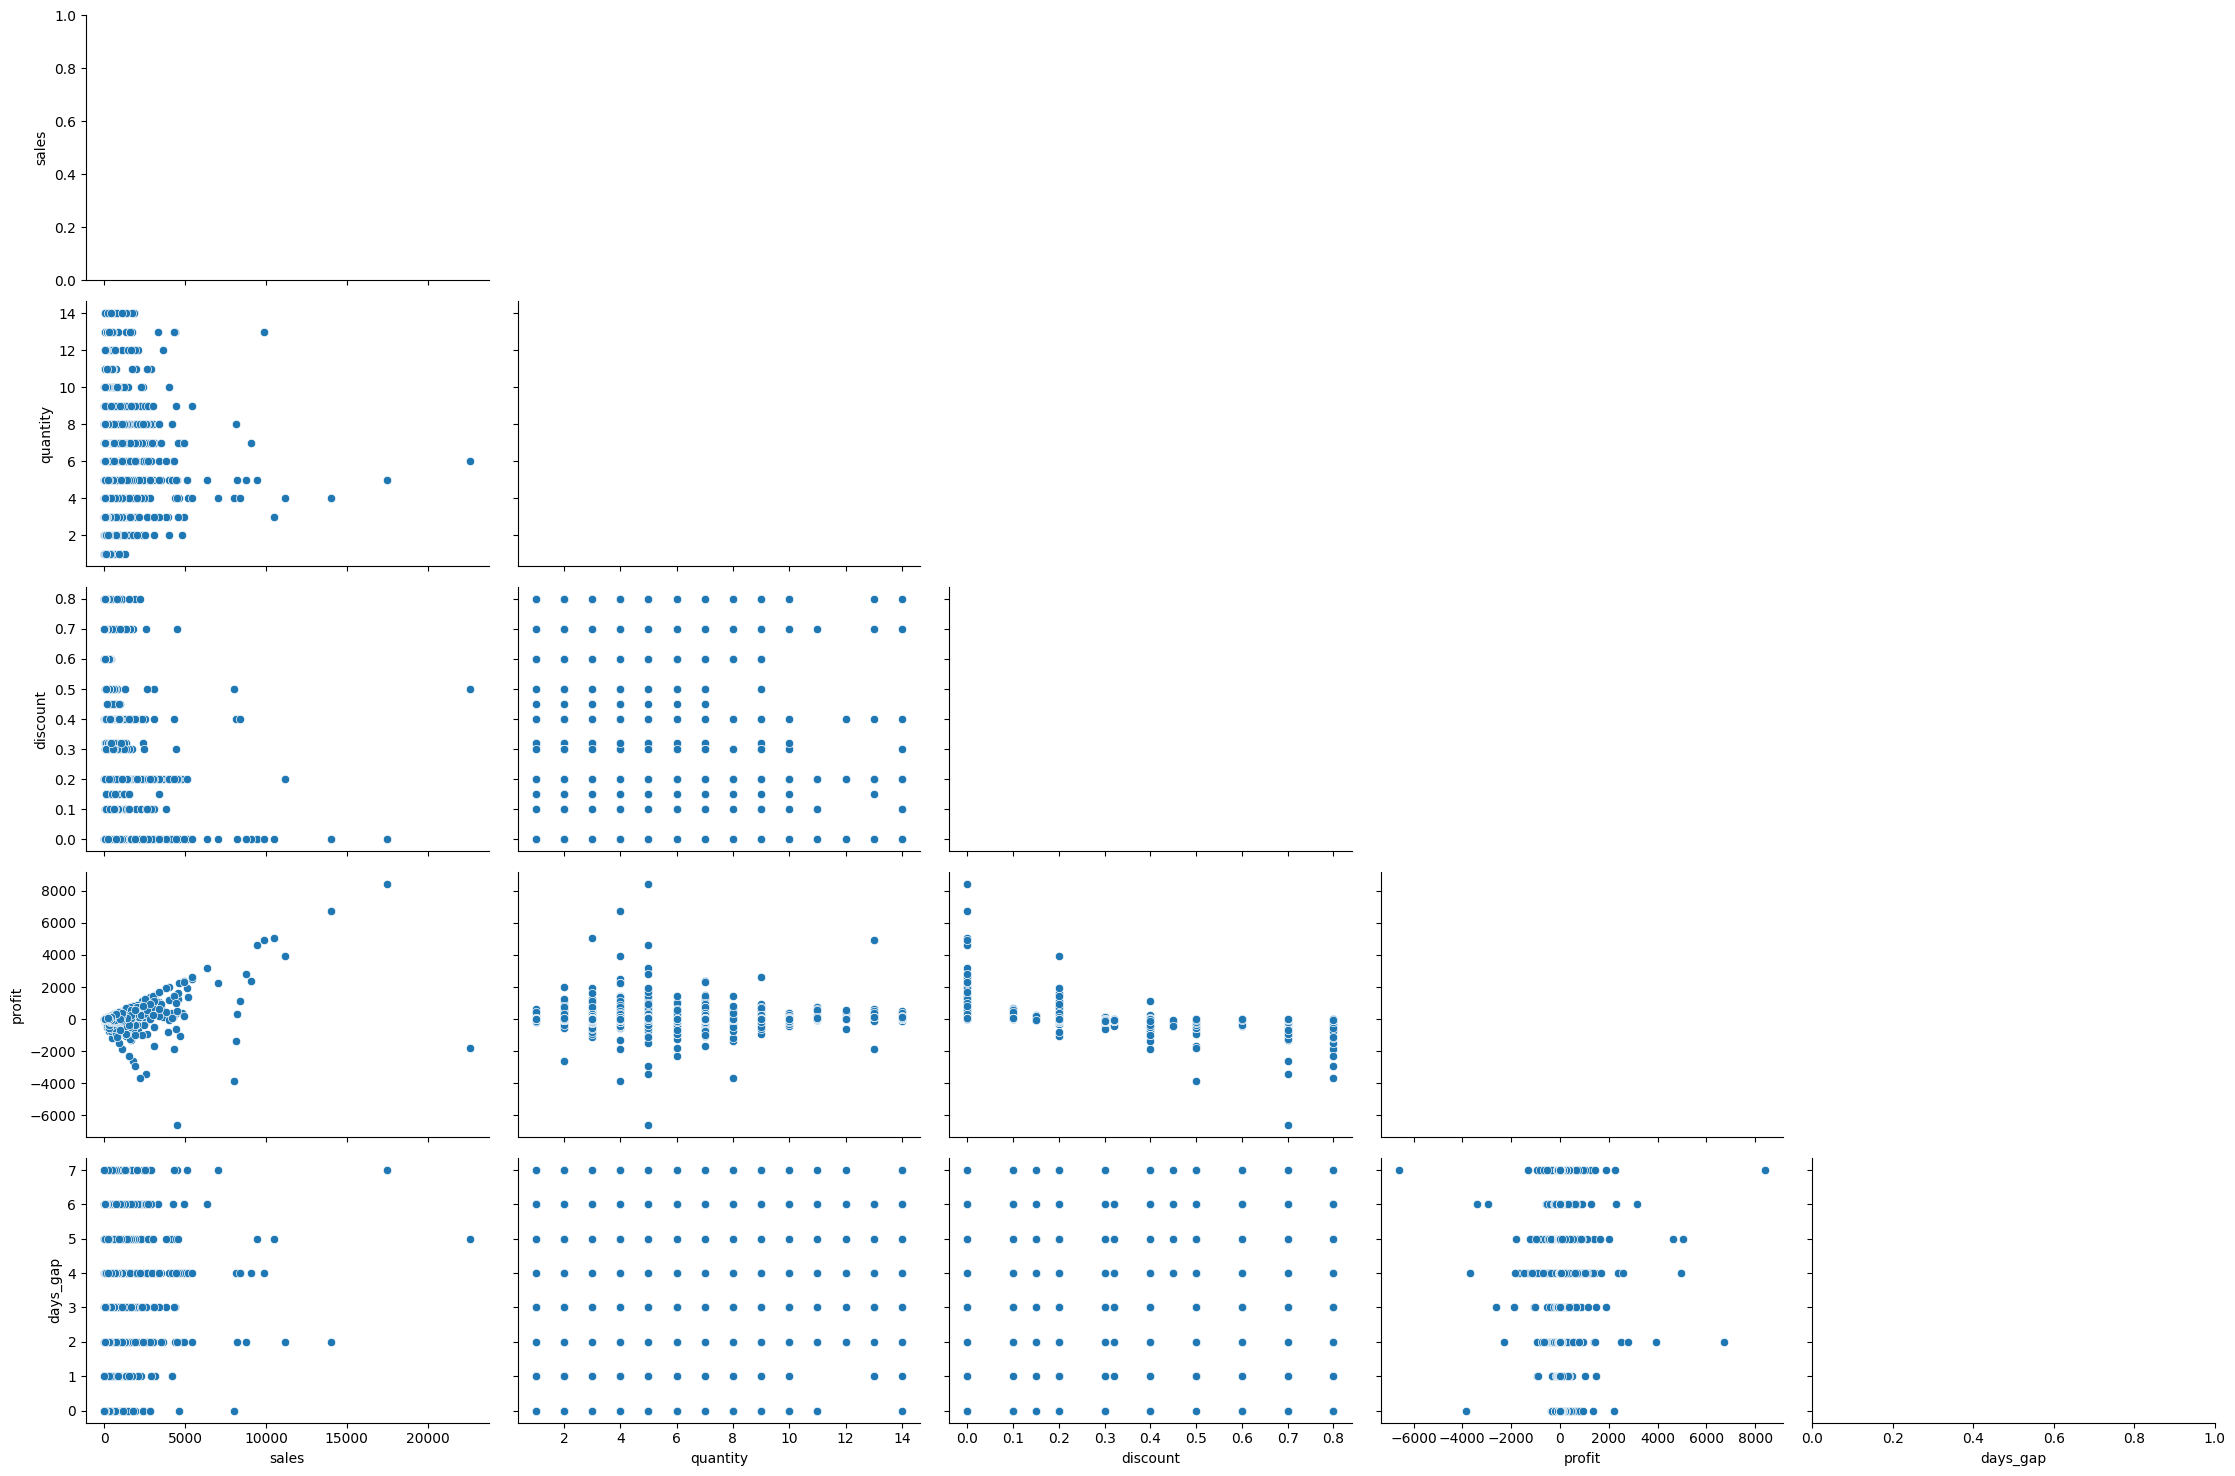

In [20]:
pair_plots(store)

### Correlation Analysis

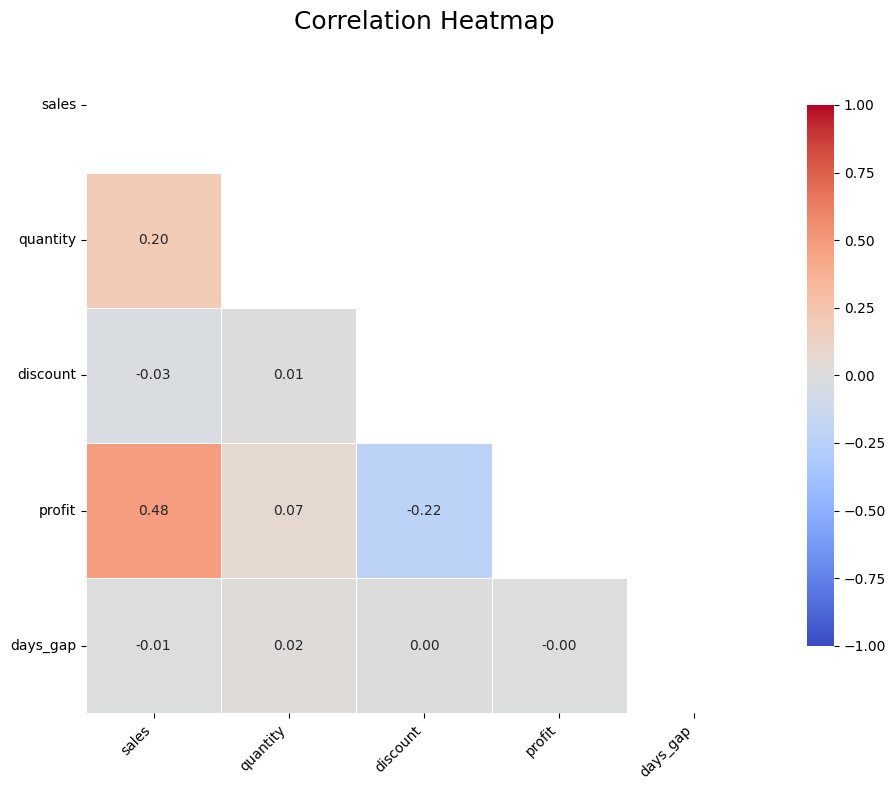

In [21]:
corr = store.corr(numeric_only=True)

# Mask to hide upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(10,8))

sns.heatmap(
        corr,
        mask=mask,          # Mask upper triangle
        annot=True,         # Show correlation values
        fmt=".2f",          # Format values
        cmap="coolwarm",    # Color map
        vmin=-1, vmax=1,    # Fixed color range
        linewidths=0.5,     # Line between squares
        square=True,        # Square cells
        cbar_kws={"shrink": 0.8}
)

plt.title("Correlation Heatmap", fontsize=18)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

- There is a positive correlation between `profit` and `sales`
- There is a negative correlation between `profit` and `discount`

## Detailed Analysis

In [22]:
store.columns

Index(['order_date', 'ship_date', 'ship_mode', 'customer_name', 'segment',
       'country', 'city', 'state', 'region', 'category', 'sub_category',
       'product_name', 'sales', 'quantity', 'discount', 'profit', 'days_gap'],
      dtype='object')

#### Time and Trends (`order_date`, `ship_date`,`days_gap`)

**Univariate Analysis**

<ipython-input-23-5ca052d6d1a0>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .groupby([pd.Grouper(key="order_date", freq="M"), 'year'])


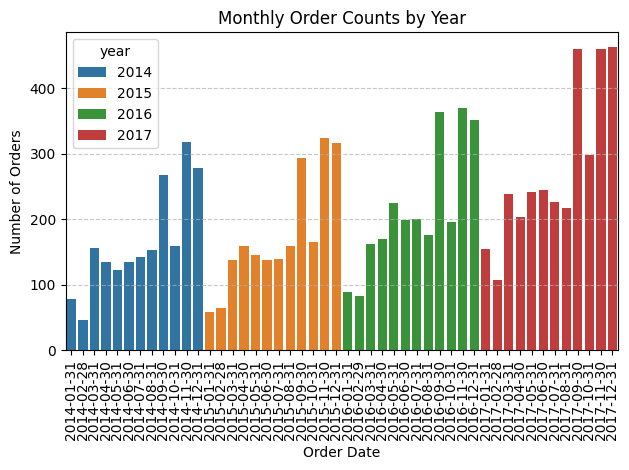

In [23]:
store['year'] = store['order_date'].dt.year

(
    store
    .groupby([pd.Grouper(key="order_date", freq="M"), 'year'])
    .size()
    .reset_index(name='count')
    .pipe(
        lambda df_:
            sns.barplot(
                data=df_,
                x='order_date',
                y='count',
                hue='year',
                palette='tab10'
            )
    )
)

plt.title("Monthly Order Counts by Year")
plt.xlabel("Order Date")
plt.ylabel("Number of Orders")

# Format x-ticks
ax = plt.gca()
plt.xticks(rotation=90)

plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


**Bivariate Analysis**

(array([0, 1, 2, 3]),
 [Text(0, 0, '2014-12-31 00:00:00'),
  Text(1, 0, '2015-12-31 00:00:00'),
  Text(2, 0, '2016-12-31 00:00:00'),
  Text(3, 0, '2017-12-31 00:00:00')])

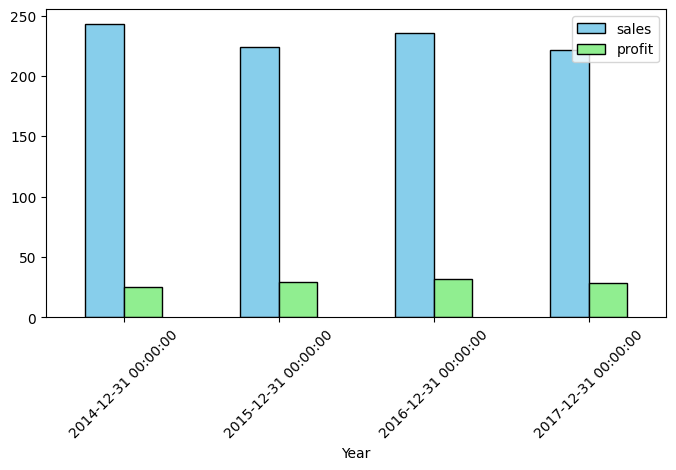

In [24]:
# Yearly Analysis of sales and profit

(
    store
    .groupby(pd.Grouper(key="order_date", freq="YE"))
    [["sales","profit"]].mean()
    #.set_axis(["2014","2015","2016","2017"],axis=0)
    .rename_axis(index="Year")
    .plot(
        kind="bar",
        figsize=(8, 4),
        edgecolor="black",
        color=["skyblue", "lightgreen"]

    )
)

plt.xticks(rotation=45)



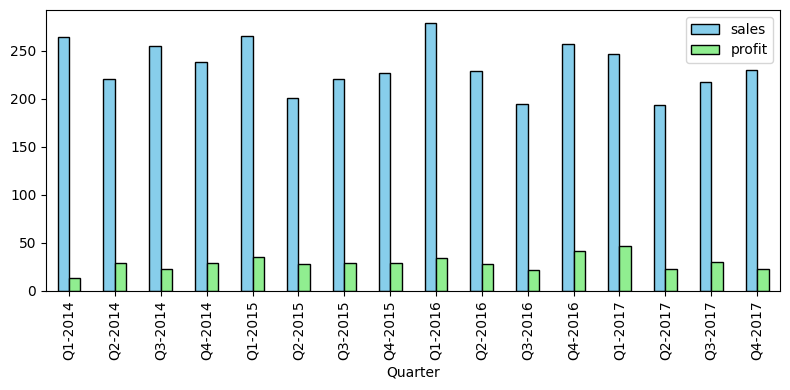

In [25]:
# Quarterly analysis of sales and profit

(
    store
    .groupby(pd.Grouper(key="order_date", freq="QE"))
    [["sales","profit"]].mean()
    .set_axis(["Q1-2014","Q2-2014","Q3-2014","Q4-2014","Q1-2015","Q2-2015","Q3-2015","Q4-2015","Q1-2016","Q2-2016","Q3-2016","Q4-2016","Q1-2017","Q2-2017","Q3-2017","Q4-2017"],axis=0)
    .rename_axis(index="Quarter")
    .plot(
        kind="bar",
        figsize=(8, 4),
        edgecolor="black",
        color=["skyblue", "lightgreen"]

    )
)

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Customer Analysis (`customer_name`,`segment`)

In [26]:
(
    store
    .customer_name
    .value_counts()
)

,count
customer_name,
William Brown,37
Matt Abelman,34
John Lee,34
Paul Prost,34
Chloris Kastensmidt,32
...,...
Anthony O'Donnell,1
Lela Donovan,1
Jocasta Rupert,1


In [27]:
customer = (
    store
    .groupby("customer_name")
    .agg(
        number_of_orders=("customer_name", "count"),
        sales=("sales", "sum"),
        quantity=("quantity", "sum"),
        profit=("profit","sum")
    )
    .assign(
        average_sales_per_order = lambda df_ : df_.sales/df_.number_of_orders,
        average_profit_per_order = lambda df_: df_.profit/df_.number_of_orders,
        average_quantity_per_order = lambda df_ : df_.quantity/df_.number_of_orders,
        profit_margin = lambda df_ : df_.profit/df_.sales
    )

)

customer.head(10)

,number_of_orders,sales,quantity,profit,average_sales_per_order,average_profit_per_order,average_quantity_per_order,profit_margin
customer_name,,,,,,,,
Aaron Bergman,6,886.156,13,129.3465,147.692667,21.557750,2.166667,0.145964
Aaron Hawkins,11,1744.700,54,365.2152,158.609091,33.201382,4.909091,0.209328
Aaron Smayling,10,3050.692,48,-253.5746,305.069200,-25.357460,4.800000,-0.083120
Adam Bellavance,18,7755.620,56,2054.5885,430.867778,114.143806,3.111111,0.264916
Adam Hart,20,3250.337,75,281.1890,162.516850,14.059450,3.750000,0.086511
Adam Shillingsburg,25,3255.310,81,64.5374,130.212400,2.581496,3.240000,0.019825
Adrian Barton,20,14473.571,73,5444.8055,723.678550,272.240275,3.650000,0.376190
Adrian Hane,16,1735.514,65,-2.3146,108.469625,-0.144662,4.062500,-0.001334
Adrian Shami,3,58.820,9,21.8496,19.606667,7.283200,3.000000,0.371465


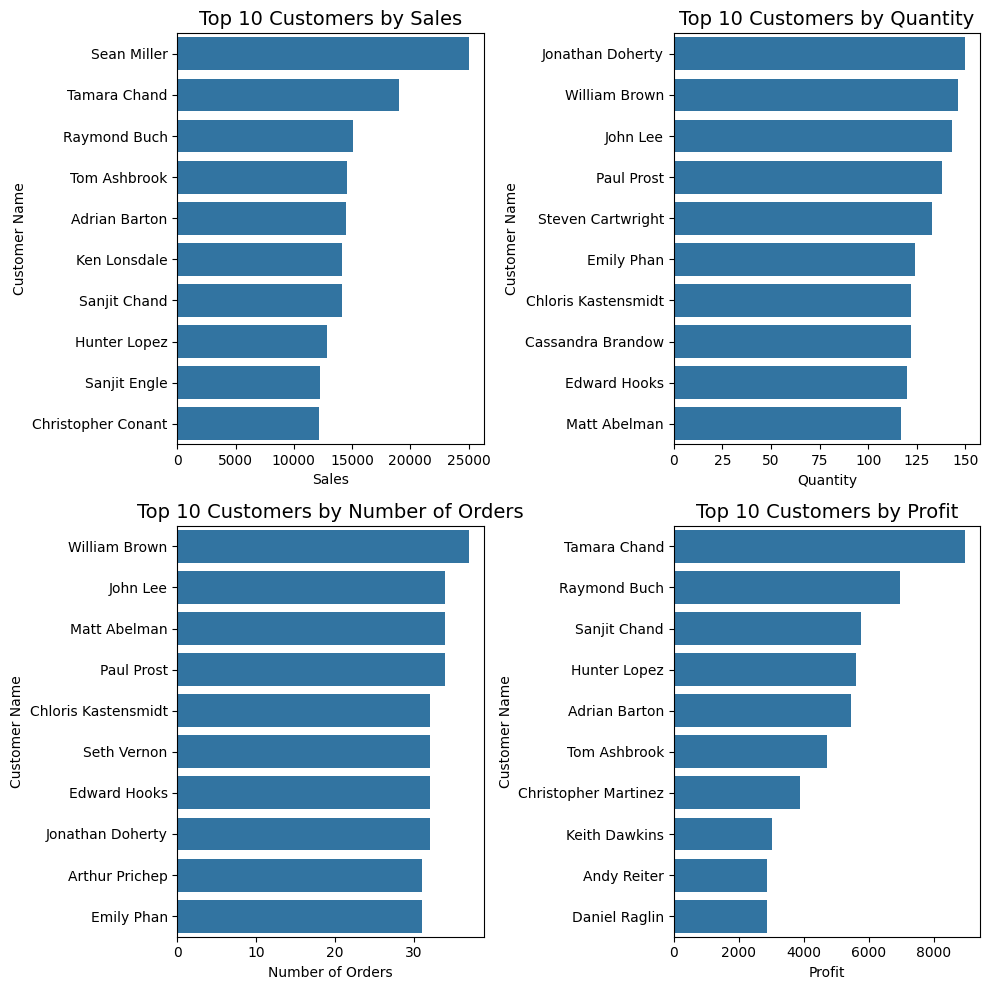

In [28]:
# 1. Top 10 Customers Data for Each Metric
top_customer_sales = customer.sort_values(by="sales", ascending=False)[:10]
top_customer_quantity = customer.sort_values(by="quantity", ascending=False)[:10]
top_customer_orders = customer.sort_values(by="number_of_orders", ascending=False)[:10]
top_customer_profit = customer.sort_values(by="profit", ascending=False)[:10]

# 2. Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 10))  # 2 rows, 2 columns

# 3. Plot each on its own axis
sns.barplot(x="sales", y="customer_name", data=top_customer_sales, ax=axes[0,0])
axes[0,0].set_title("Top 10 Customers by Sales", fontsize=14)
axes[0,0].set_xlabel("Sales")
axes[0,0].set_ylabel("Customer Name")

sns.barplot(x="quantity", y="customer_name", data=top_customer_quantity, ax=axes[0,1])
axes[0,1].set_title("Top 10 Customers by Quantity", fontsize=14)
axes[0,1].set_xlabel("Quantity")
axes[0,1].set_ylabel("Customer Name")

sns.barplot(x="number_of_orders", y="customer_name", data=top_customer_orders, ax=axes[1,0])
axes[1,0].set_title("Top 10 Customers by Number of Orders", fontsize=14)
axes[1,0].set_xlabel("Number of Orders")
axes[1,0].set_ylabel("Customer Name")

sns.barplot(x="profit", y="customer_name", data=top_customer_profit, ax=axes[1,1])
axes[1,1].set_title("Top 10 Customers by Profit", fontsize=14)
axes[1,1].set_xlabel("Profit")
axes[1,1].set_ylabel("Customer Name")

# 4. Adjust layout so nothing overlaps
plt.tight_layout()

# 5. Show the full figure
plt.show()

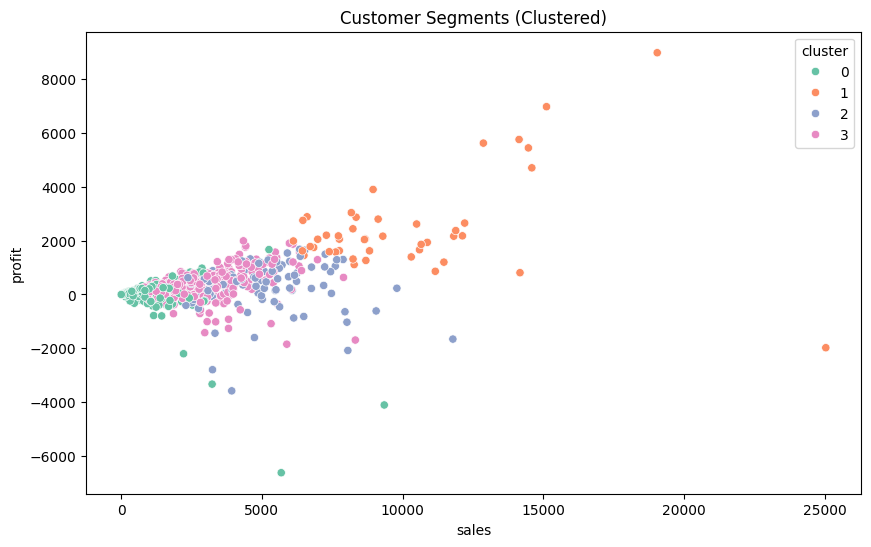

In [29]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select Features
X = customer[["sales", "profit", "number_of_orders", "quantity"]]

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# KMeans Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
customer["cluster"] = kmeans.fit_predict(X_scaled)

# Visualize Clusters
plt.figure(figsize=(10,6))
sns.scatterplot(data=customer, x="sales", y="profit", hue="cluster", palette="Set2")
plt.title("Customer Segments (Clustered)")
plt.show()

### Geographical Analysis (`country`, `city`, `state`, `region`)

In [34]:
(
    store
    .country
    .unique()
)

array(['United States'], dtype=object)

In [45]:
(
    store
    .groupby(["region","state"])
    [["profit","sales"]].sum()
    .sort_values(by=["region","profit"], ascending=False)
    .assign(

    )
)

profit        sales
region  state                                        
West    California            76381.3871  457687.6315
        Washington            33402.6517  138641.2700
        Nevada                 3316.7659   16729.1020
        Utah                   2546.5335   11220.0560
        Montana                1833.3285    5589.3520
        New Mexico             1157.1161    4783.5220
        Idaho                   826.7231    4382.4860
        Wyoming                 100.1960    1603.1360
        Oregon                -1190.4705   17431.1500
        Arizona               -3427.9246   35282.0010
        Colorado              -6527.8579   32108.1180
South   Virginia              18597.9504   70636.7200
        Georgia               16250.0433   49095.8400
        Kentucky              11199.6966   36591.7500
        Alabama                5786.8253   19510.6400
        Arkansas               4008.6871   11678.1300
        Mississippi            3172.9762   10771.3400
        Louisiana              2196.1023    9217.0300
        South Carolina         1769.0566    8481.7100
        Florida               -3399.3017   89473.7080
        Tennessee             -5341.6936   30661.8730
        North Carolina        -7490.9122   55603.1640
East    New York              74038.5486  310876.2710
        Delaware               9977.3748   27451.0690
        New Jersey             9772.9138   35764.3120
        Rhode Island           7285.6293   22627.9560
        Maryland               7031.1788   23705.5230
        Massachusetts          6785.5016   28634.4340
        Connecticut            3511.4918   13384.3570
        Vermont                2244.9783    8929.3700
        New Hampshire          1706.5028    7292.5240
        District of Columbia   1059.5893    2865.0200
        Maine                   454.4862    1270.5300
        West Virginia           185.9216    1209.8240
        Pennsylvania         -15559.9603  116511.9140
        Ohio                 -16971.3766   78258.1360
Central Michigan              24463.1876   76269.6140
        Indiana               18382.9363   53555.3600
        Minnesota             10823.1874   29863.1500
        Wisconsin              8401.8004   32114.6100
        Missouri               6436.2105   22205.1500
        Oklahoma               4853.9560   19683.3900
        Nebraska               2037.0942    7464.9300
        Iowa                   1183.8119    4579.7600
        Kansas                  836.4435    2914.3100
        South Dakota            394.8283    1315.5600
        North Dakota            230.1497     919.9100
        Illinois             -12607.8870   80166.1010
        Texas                -25729.3563  170188.0458

**Geographical analysis:**

- In the West, California is the most profitable state, while Colorado is the least profitable state.
- In the South, Virginia is the most profitable state, while North Carolina is the least profitable state.
- In the East, New York is the most profitable state, while Ohio is the least profitable state.
- In the Central, Michigan is the most profitable state, while Texas is the least profitable state.

### Product Performance (`category`, `sub_category`, `product_name`)

### Sales and Profit Drivers (`sales`,`qantity`,`discount`,`profit`)

### Logitics Impact (`ship_mode`)

**Univariate Analysis**

<Axes: title={'center': 'Ship Mode Percentage'}, xlabel='ship_mode'>

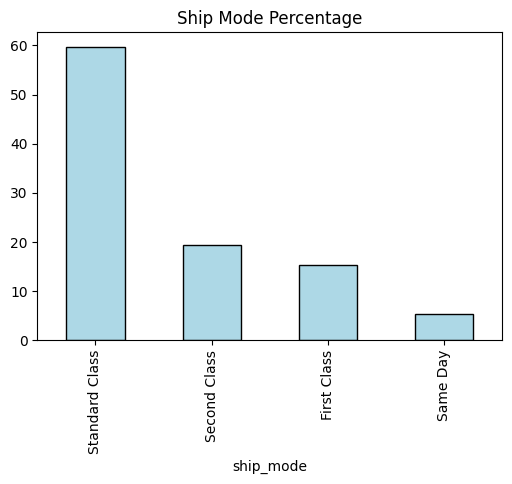

In [30]:
# Distribution of ship mode [Univariate analysis]

(
    store
    .ship_mode
    .value_counts(normalize=True)     # 1. normalize = percentage
    .mul(100)                          # 2. multiply by 100 (more readable way)
    .round(2)                          # 3. round nicely
    .sort_values(ascending=False)      # 4. sort if needed
    .to_frame(name="percentage")       # 5. convert to dataframe
    .rename_axis("ship_mode")           # 6. rename index
    .reset_index()                      # 7. bring ship_mode back as column
    .plot(
        x="ship_mode",
        y="percentage",
        kind="bar",
        figsize=(6, 4),
        color="lightblue",
        edgecolor="black",
        legend=False,
        title="Ship Mode Percentage"
    )
)


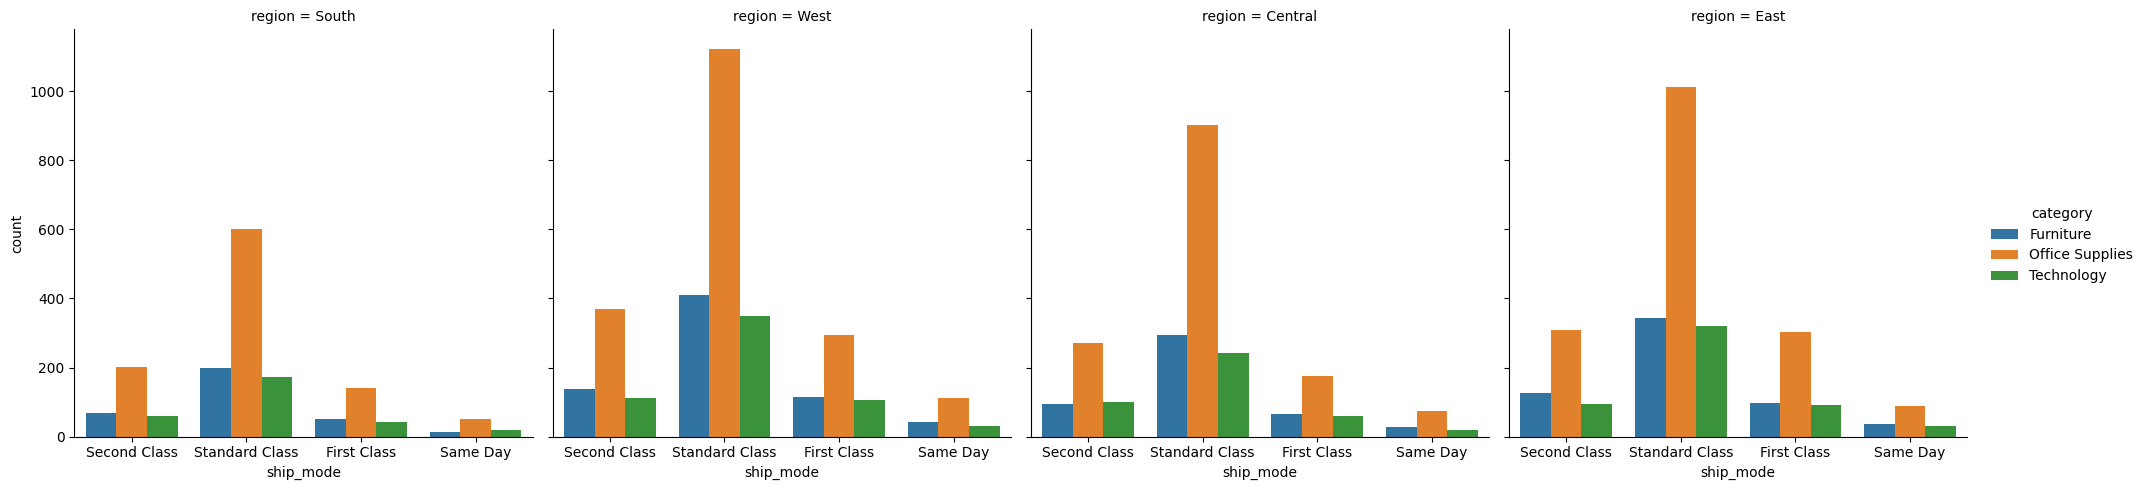

In [31]:
# More detailed analysis of the distribution of ship_mode

sns.catplot(data = store, x='ship_mode', kind='count', hue='category',col='region')

**Bivariate Analysis**

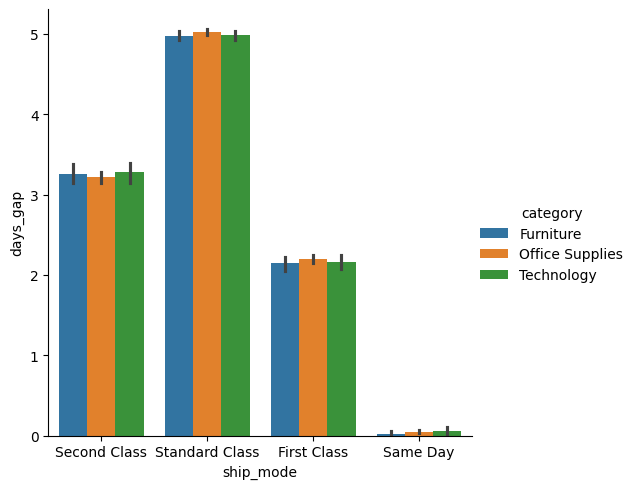

In [32]:
# Between ship_mode and days_gap

sns.catplot(data = store, x='ship_mode',y ='days_gap', kind='bar', hue='category')

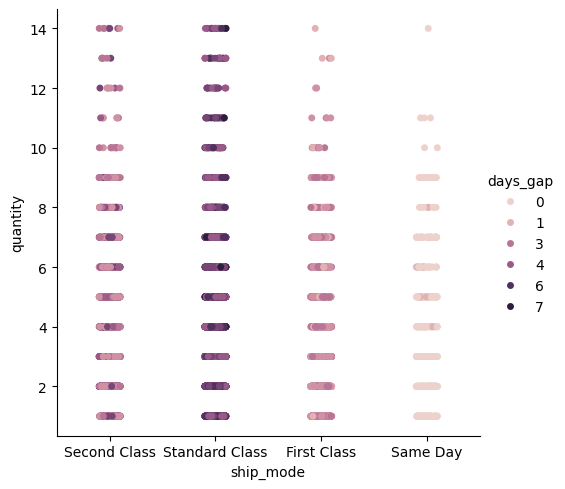

In [33]:
# Between ship_mode and quantity

sns.catplot(data = store, x='ship_mode',y ='quantity', hue='days_gap')

### Conclusion

**order_date:**

- The business is growing strongly over time (more orders each year).
- There’s a clear seasonal trend: peak in Nov-Dec, dip around June-July.
- 2017 saw a major jump — possibly due to business expansion, better marketing, new product launches, or market changes.
- **Strategic Planning:** The company should prepare inventory, hire more workers, and launch promotions before holiday seasons.
- Efforts to boost mid-year sales could be made, such as introducing mid-year campaigns or offering to reduce dips.
- Even though all the above patterns can be seen in number of orders but yearly sales and yearly profit show little to no variation.

  **Question:** Analyze why the number of orders were increasing but there is minimal variation in sales and profit.

  **Possible Explanation:** Average order value variation (Total sales / Number of orders), discount and promotions, Product mix change (low-value products vs high-value products)
  
  **New Measures:** Average Order Value over Time (Sales ÷ Orders per month/quarter), Profit Margin over Time (Profit ÷ Sales).

**ship_mode:**

- Majority of orders are shipped via standard class
- Almost all the same day delivery orders have days_gap = 0, which should be the case according to it's definition
- Standard class orders have more gap in the days betweeen order_date and ship_date, also it is managing the most number of high quantity orders, which can explain the days_gap.
-

**customer_name:**

- There are 793 unique customers, and William Brown has placed the maximum number of orders.
-
